In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

In [22]:
stopwords

<WordListCorpusReader in 'C:\\Users\\Aishwarya MMPL\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [64]:
data= pd.read_csv("C:/Users/Aishwarya MMPL/Documents/GUVI_PYTHON/IMDB.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [65]:
data["sentiment"].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [5]:
data.shape

(500, 2)

In [66]:
data.dropna(inplace=True)

In [7]:
data.shape

(500, 2)

In [67]:
data["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [68]:
def clean_data(review):
    listed= [i for i in review.split() if i.lower() not in stopwords.words("english")]
    str=" ".join(listed)
    return str

In [69]:
data["review"]= data["review"].apply(clean_data)

In [70]:
data["review"]

0      One reviewers mentioned watching 1 Oz episode ...
1      wonderful little production. filming technique...
2      thought wonderful way spend time hot summer we...
3      Basically there's family little boy (Jake) thi...
4      Petter Mattei's "Love Time Money" visually stu...
                             ...                        
495    "American Nightmare" officially tied, opinion,...
496    First off, say loved book Animal Farm. read 9t...
497    movie extremely boring. laughed times. decided...
498    disgusted movie. graphic sex scenes, ruined im...
499    joyous world created us Pixar's Bug's Life; we...
Name: review, Length: 500, dtype: object

In [31]:
from wordcloud import WordCloud

In [ ]:
reviews=" ".join(i for i in data["review"][data["sentiment"]=="negative"])
wordcloud= WordCloud(width=1000, height=600, max_font_size=1000,background_color= "white")
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews))
plt.axis("off")
plt.show()


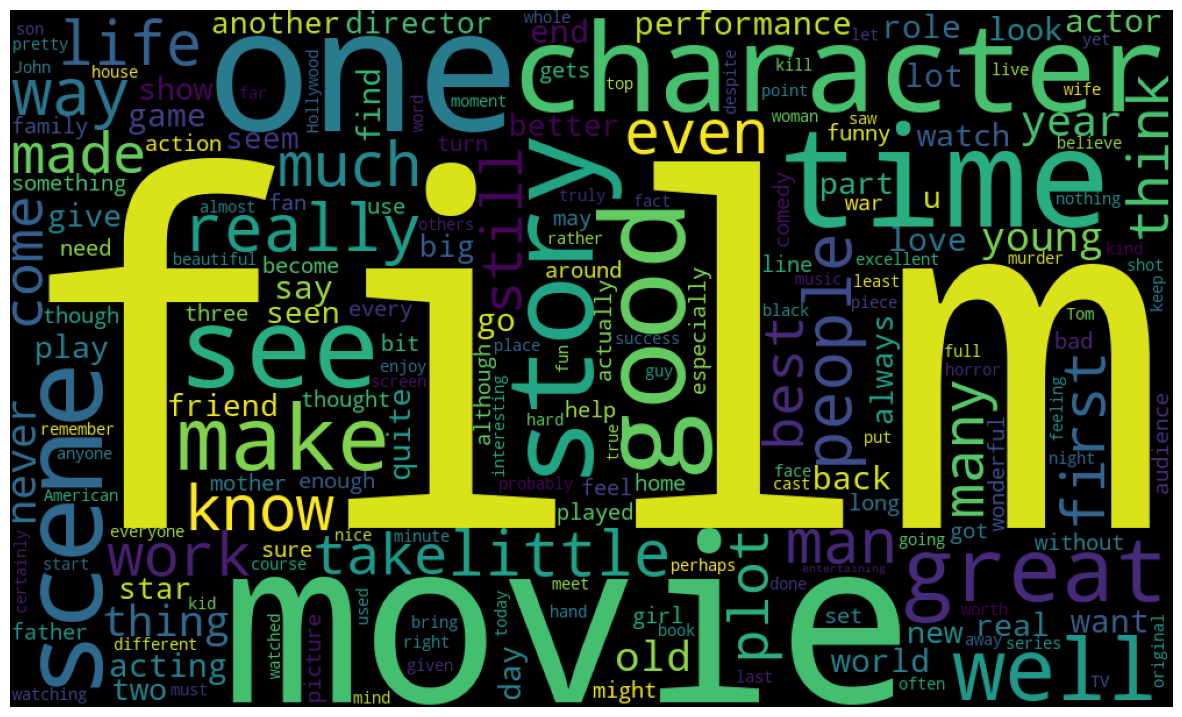

In [33]:
reviews=" ".join(i for i in data["review"][data["sentiment"]=="positive"])
wordcloud= WordCloud(width=1000, height=600, max_font_size=1000)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews))
plt.axis("off")
plt.show()

In [71]:
df= data
df

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically there's family little boy (Jake) thi...,negative
4,"Petter Mattei's ""Love Time Money"" visually stu...",positive
...,...,...
495,"""American Nightmare"" officially tied, opinion,...",negative
496,"First off, say loved book Animal Farm. read 9t...",negative
497,movie extremely boring. laughed times. decided...,negative
498,"disgusted movie. graphic sex scenes, ruined im...",negative


In [72]:
df= data

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector= TfidfVectorizer(max_features=5000)
rev= vector.fit_transform(data["review"]).toarray()

In [75]:
data["sentiment"]=data["sentiment"].replace(["positive","negative"],[1,0])
data["sentiment"]

0      1
1      1
2      1
3      0
4      1
      ..
495    0
496    0
497    0
498    0
499    1
Name: sentiment, Length: 500, dtype: int64

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import  train_test_split
xtrain,xtest, ytrain, ytest= train_test_split(rev,data["sentiment"],train_size=0.8)



In [80]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [81]:
ypred= model.predict(xtest)

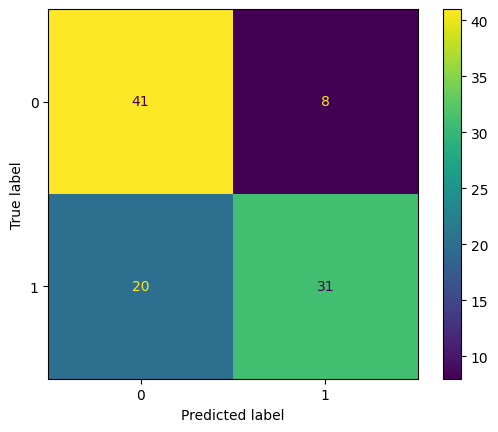

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(ytest,ypred,labels=model.classes_)
display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [87]:
import pickle as pk


In [ ]:
pk.dump(model,open("model.pkl","wb"))